Graph saved to outputs/compression_decompression_times.png
Graph saved to outputs/compression_rate.png


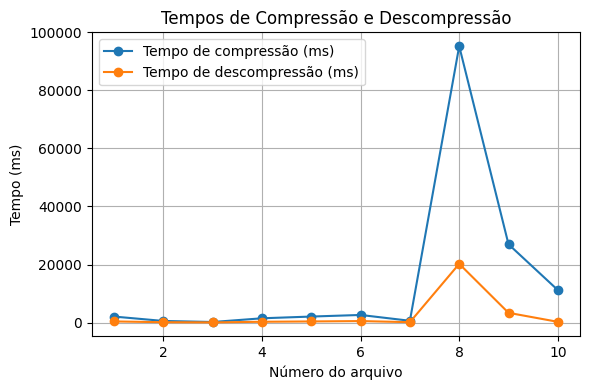

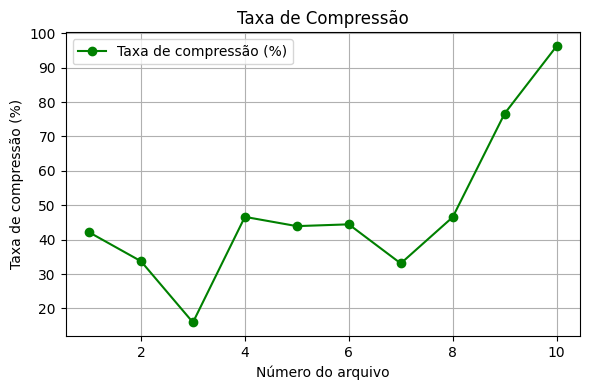

In [1]:
import os
import re
import matplotlib.pyplot as plt

# Directory containing the log files
log_dir = "outputs"

# Regex patterns to extract data
compression_time_pattern = r"Tempo de compressão = ([\d.]+) ms"
decompression_time_pattern = r"Tempo de descompressão = ([\d.]+) ms"
compression_rate_pattern = r"Taxa de compressão = ([\d.]+)%"

# Initialize data storage
file_numbers = []
compression_times = []
decompression_times = []
compression_rates = []

# Process each .log file in the directory
for file_name in sorted(os.listdir(log_dir)):
    if file_name.endswith(".log"):
        file_path = os.path.join(log_dir, file_name)
        with open(file_path, "r", encoding="utf-8") as log_file:
            content = log_file.read()
            
            # Extract data using regex
            compression_match = re.search(compression_time_pattern, content)
            decompression_match = re.search(decompression_time_pattern, content)
            compression_rate_match = re.search(compression_rate_pattern, content)
            
            if compression_match and decompression_match and compression_rate_match:
                file_number = int(file_name.split('.')[0])  # Extract file number
                file_numbers.append(file_number)
                compression_times.append(float(compression_match.group(1)))
                decompression_times.append(float(decompression_match.group(1)))
                compression_rates.append(float(compression_rate_match.group(1)))

# Sort data by file numbers
sorted_indices = sorted(range(len(file_numbers)), key=lambda i: file_numbers[i])
file_numbers = [file_numbers[i] for i in sorted_indices]
compression_times = [compression_times[i] for i in sorted_indices]
decompression_times = [decompression_times[i] for i in sorted_indices]
compression_rates = [compression_rates[i] for i in sorted_indices]

# Plot compression and decompression times
plt.figure(figsize=(6, 4))
plt.plot(file_numbers, compression_times, label="Tempo de compressão (ms)", marker="o")
plt.plot(file_numbers, decompression_times, label="Tempo de descompressão (ms)", marker="o")
plt.xlabel("Número do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Tempos de Compressão e Descompressão")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the first graph
output_graph_path1 = os.path.join(log_dir, "compression_decompression_times.png")
plt.savefig(output_graph_path1)
print(f"Graph saved to {output_graph_path1}")

# Plot compression rates
plt.figure(figsize=(6, 4))
plt.plot(file_numbers, compression_rates, label="Taxa de compressão (%)", marker="o", color="green")
plt.xlabel("Número do arquivo")
plt.ylabel("Taxa de compressão (%)")
plt.title("Taxa de Compressão")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the second graph
output_graph_path2 = os.path.join(log_dir, "compression_rate.png")
plt.savefig(output_graph_path2)
print(f"Graph saved to {output_graph_path2}")

# Show the graphs
plt.show()
